# Argo data by float

## Data files organized by float

<img src="https://github.com/PedroVelez/argoonlineschool/raw/master/images/dac.png" alt="xarray logo" width="650"/>

Accessing the *dac* folder in any of the FTP or HTTP sites of andy of the GDAC you will find several folders, one for each of the DACs. As indicated in the figure, within each folder there is a folder for each one of the floats that is processed by this DAC.

## WMO
Every floats is identified by an unique identifies, the **World Meteorological Organization (WMO)** 

Let's use data from the first profile of float 6901254. It is pre-downloaded in the *./Data* folder, but you can dowload it from the Coriolis GDAC. See the [Data](https://euroargodev.github.io/argoonlineschool/README.html#data) section for  instructions on how to download the data.

Note that it may happens that, in the future, you try to downdload the fles and there is not `R6901254_001.nc` and `R6901254_001D.nc` files, and you may find `D6901254_001.nc` and `D6901254_001D.nc` the fist *D* is for Delayed Mode. We will see its meaning in the following chapter, hence if you can not download them, use the copy in `./Data`

## Reading an Argo profile - the building blocks of Argo

First, import libraries

In [55]:
import xarray as xr
import netCDF4
from matplotlib import pyplot as plt
%matplotlib inline

In [83]:
Profile1 = xr.open_dataset('./Data/6901254/profiles/R6901254_001.nc')
Profile10 = xr.open_dataset('./Data/6901254/profiles/R6901254_010.nc')
Profile1


<xarray.Dataset>
Dimensions:                       (N_CALIB: 1, N_HISTORY: 3, N_LEVELS: 97, N_PARAM: 3, N_PROF: 2)
Dimensions without coordinates: N_CALIB, N_HISTORY, N_LEVELS, N_PARAM, N_PROF
Data variables:
    DATA_TYPE                     object ...
    FORMAT_VERSION                object ...
    HANDBOOK_VERSION              object ...
    REFERENCE_DATE_TIME           object ...
    DATE_CREATION                 object ...
    DATE_UPDATE                   object ...
    PLATFORM_NUMBER               (N_PROF) object ...
    PROJECT_NAME                  (N_PROF) object ...
    PI_NAME                       (N_PROF) object ...
    STATION_PARAMETERS            (N_PROF, N_PARAM) object ...
    CYCLE_NUMBER                  (N_PROF) float64 ...
    DIRECTION                     (N_PROF) object ...
    DATA_CENTRE                   (N_PROF) object ...
    DC_REFERENCE                  (N_PROF) object ...
    DATA_STATE_INDICATOR          (N_PROF) object ...
    DATA_MODE                     (N_PROF) object ...
    PLATFORM_TYPE                 (N_PROF) object ...
    FLOAT_SERIAL_NO               (N_PROF) object ...
    FIRMWARE_VERSION              (N_PROF) object ...
    WMO_INST_TYPE                 (N_PROF) object ...
    JULD                          (N_PROF) datetime64[ns] ...
    JULD_QC                       (N_PROF) object ...
    JULD_LOCATION                 (N_PROF) datetime64[ns] ...
    LATITUDE                      (N_PROF) float64 ...
    LONGITUDE                     (N_PROF) float64 ...
    POSITION_QC                   (N_PROF) object ...
    POSITIONING_SYSTEM            (N_PROF) object ...
    PROFILE_PRES_QC               (N_PROF) object ...
    PROFILE_TEMP_QC               (N_PROF) object ...
    PROFILE_PSAL_QC               (N_PROF) object ...
    VERTICAL_SAMPLING_SCHEME      (N_PROF) object ...
    CONFIG_MISSION_NUMBER         (N_PROF) float64 ...
    PRES                          (N_PROF, N_LEVELS) float32 ...
    PRES_QC                       (N_PROF, N_LEVELS) object ...
    PRES_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    PRES_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    PRES_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    TEMP                          (N_PROF, N_LEVELS) float32 ...
    TEMP_QC                       (N_PROF, N_LEVELS) object ...
    TEMP_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    TEMP_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    TEMP_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    PSAL                          (N_PROF, N_LEVELS) float32 ...
    PSAL_QC                       (N_PROF, N_LEVELS) object ...
    PSAL_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    PSAL_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    PSAL_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    HISTORY_INSTITUTION           (N_HISTORY, N_PROF) object ...
    HISTORY_STEP                  (N_HISTORY, N_PROF) object ...
    HISTORY_SOFTWARE              (N_HISTORY, N_PROF) object ...
    HISTORY_SOFTWARE_RELEASE      (N_HISTORY, N_PROF) object ...
    HISTORY_REFERENCE             (N_HISTORY, N_PROF) object ...
    HISTORY_DATE                  (N_HISTORY, N_PROF) object ...
    HISTORY_ACTION                (N_HISTORY, N_PROF) object ...
    HISTORY_PARAMETER             (N_HISTORY, N_PROF) object ...
    HISTORY_START_PRES            (N_HISTORY, N_PROF) float32 ...
    HISTORY_STOP_PRES             (N_HISTORY, N_PROF) float32 ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY, N_PROF) float32 ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object ...
    PARAMETER                     (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_EQUATION     (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_COEFFICIENT  (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_COMMENT      (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_DATE         (N_PROF, N_CAL

In [115]:
Profile1D = xr.open_dataset('./Data/6901254/profiles/R6901254_001D.nc')
print(Profile1.VERTICAL_SAMPLING_SCHEME.values[1])
l=Profile1.DATA_CENTRE[0].values
type(l)

b'Near-surface sampling: averaged, unpumped [10 sec sampling, 1 dbar average from 5.5 dbar to surface]                                                                                                                                                            '


TypeError: 'numpy.ndarray' object is not callable

Once a floats is deployed...

In [85]:
#print(Profile1.PSAL)
print(Profile1D.DIRECTION)
print(Profile1D.CYCLE_NUMBER, Profile1.CYCLE_NUMBER,Profile10.CYCLE_NUMBER)

<xarray.DataArray 'DIRECTION' (N_PROF: 1)>
array([b'D'], dtype=object)
Dimensions without coordinates: N_PROF
Attributes:
    long_name:    Direction of the station profiles
    conventions:  A: ascending profiles, D: descending profiles
<xarray.DataArray 'CYCLE_NUMBER' (N_PROF: 1)>
array([1.])
Dimensions without coordinates: N_PROF
Attributes:
    long_name:    Float cycle number
    conventions:  0...N, 0 : launch cycle (if exists), 1 : first complete cycle <xarray.DataArray 'CYCLE_NUMBER' (N_PROF: 2)>
array([1., 1.])
Dimensions without coordinates: N_PROF
Attributes:
    long_name:    Float cycle number
    conventions:  0...N, 0 : launch cycle (if exists), 1 : first complete cycle <xarray.DataArray 'CYCLE_NUMBER' (N_PROF: 2)>
array([10., 10.])
Dimensions without coordinates: N_PROF
Attributes:
    long_name:    Float cycle number
    conventions:  0...N, 0 : launch cycle (if exists), 1 : first complete cycle


<xarray.DataArray 'PSAL' (N_PROF: 2, N_LEVELS: 97)>
array([[36.697, 36.697, 36.697, 36.698, 36.698, 36.699, 36.706, 36.702,
        36.558, 36.471, 36.437, 36.463, 36.493, 36.46 , 36.422, 36.414,
        36.398, 36.343, 36.303, 36.272, 36.235, 36.206, 36.172, 36.128,
        36.067, 35.986, 35.924, 35.859, 35.811, 35.771, 35.748, 35.722,
        35.688, 35.662, 35.636, 35.6  , 35.577, 35.556, 35.532, 35.51 ,
        35.486, 35.465, 35.441, 35.429, 35.413, 35.402, 35.391, 35.386,
        35.378, 35.361, 35.348, 35.346, 35.355, 35.377, 35.398, 35.414,
        35.43 , 35.436, 35.442, 35.454, 35.47 , 35.495, 35.53 , 35.544,
        35.533, 35.501, 35.476, 35.455, 35.435, 35.418, 35.411, 35.408,
        35.387, 35.386, 35.379, 35.375, 35.363, 35.355, 35.341, 35.329,
        35.324, 35.304, 35.29 , 35.283, 35.273, 35.262, 35.252, 35.248,
        35.235, 35.225, 35.215, 35.206, 35.197, 35.186, 35.169, 35.153,
        35.142],
       [36.701, 36.694, 36.695, 36.695, 36.697, 36.696,    nan,    

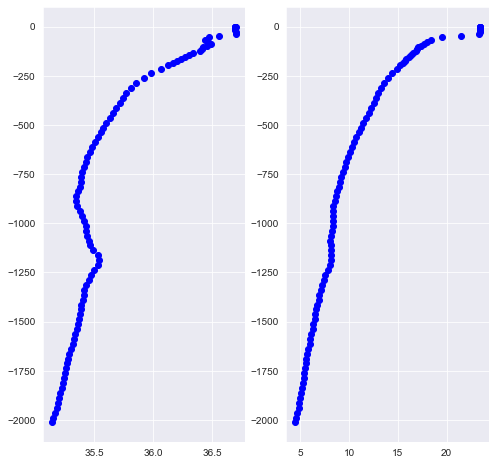

In [69]:
fig, ax = plt.subplots(1,2,figsize=(8,8))
ax[0].plot(Profile1.PSAL,-Profile1.PRES,'bo')
ax[0].grid()

ax[1].plot(Profile1.TEMP,-Profile1.PRES,'bo')
ax[1].grid()



hablar sobre ptem...

In [101]:
xrDS1D = xr.open_dataset('./Data/6901254/profiles/R6901254_001D.nc')
print(xrDS1D.JULD.values[0])


2018-10-23T20:54:00.000000000


In [41]:
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()
argo_loader = ArgoDataFetcher(backend='erddap')
argo_loader = ArgoDataFetcher(cachedir='tmp')

In [42]:
apDS=argo_loader.float(6901255).to_xarray()

In [43]:
apDS2=argo_loader.profile(6901255,1).to_xarray()

In [44]:
apDS2.argo.point2profile()

<xarray.Dataset>
Dimensions:          (N_LEVELS: 49, N_PROF: 2)
Coordinates:
  * N_PROF           (N_PROF) int64 0 1
  * N_LEVELS         (N_LEVELS) int64 0 1 2 3 4 5 6 7 ... 42 43 44 45 46 47 48
    TIME             (N_PROF) datetime64[ns] 2019-06-19T11:43:00 2019-06-21T05:38:00
    LATITUDE         (N_PROF) float64 35.85 35.91
    LONGITUDE        (N_PROF) float64 -6.934 -6.991
Data variables:
    CYCLE_NUMBER     (N_PROF) int64 1 1
    DATA_MODE        (N_PROF) <U1 'R' 'R'
    DIRECTION        (N_PROF) <U1 'D' 'A'
    PLATFORM_NUMBER  (N_PROF) int64 6901255 6901255
    POSITION_QC      (N_PROF) int64 1 1
    PRES             (N_PROF, N_LEVELS) float64 14.0 24.0 34.0 ... 788.0 813.0
    PRES_QC          (N_PROF) int64 1 1
    PSAL             (N_PROF, N_LEVELS) float64 36.35 36.45 ... 35.61 35.62
    PSAL_QC          (N_PROF) int64 1 1
    TEMP             (N_PROF, N_LEVELS) float64 19.87 19.69 18.74 ... 10.1 10.05
    TEMP_QC          (N_PROF) int64 1 1
    TIME_QC          (N_PROF) int64 1 1
Attributes:
    cdm_altitude_proxy:        pres
    cdm_data_type:             TrajectoryProfile
    cdm_profile_variables:     cycle_number, data_type, format_version, handb...
    cdm_trajectory_variables:  platform_number, project_name, pi_name, platfo...
    Conventions:               Argo-3.1, CF-1.6, COARDS, ACDD-1.3
    creator_email:             support@argo.net
    creator_name:              Argo
    creator_url:               http://www.argo.net/
    Easternmost_Easting:       -6.934000000000026
    featureType:               TrajectoryProfile
    geospatial_lat_max:        35.915
    geospatial_lat_min:        35.846
    geospatial_lat_units:      degrees_north
    geospatial_lon_max:        -6.934000000000026
    geospatial_lon_min:        -6.9909999999999854
    geospatial_lon_units:      degrees_east
    history:                   2020-07-02T22:39:30Z (local files)\n2020-07-02...
    id:                        ArgoFloats
    infoUrl:                   http://www.argo.net/
    institution:               Argo
    keywords:                  adjusted, argo, array, assembly, best, centre,...
    keywords_vocabulary:       GCMD Science Keywords
    license:                   The data may be used and redistributed for fre...
    Northernmost_Northing:     35.915
    references:                http://www.argodatamgt.org/Documentation
    source:                    Argo float
    sourceUrl:                 (local files)
    Southernmost_Northing:     35.846
    standard_name_vocabulary:  CF Standard Name Table v29
    summary:                   Argo float vertical profiles from Coriolis Glo...
    time_coverage_end:         2019-06-21T05:38:00Z
    time_coverage_start:       2019-06-19T11:43:00Z
    title:                     Argo Float Measurements
    user_manual_version:       3.1
    Westernmost_Easting:       -6.9909999999999854
    DATA_ID:                   ARGO
    DOI:                       http://doi.org/10.17882/42182
    Fetched_from:              http://www.ifremer.fr/erddap
    Fetched_by:                pvb
    Fetched_date:              2020/07/02
    Fetched_constraints:       phy_WMO6901255_CYC0001
    Fetched_uri:               http://www.ifremer.fr/erddap/tabledap/ArgoFloa...

## Meta data

## Trayectory data

In [14]:
Rtraj = xr.open_dataset('./Data/6901254/6901254_Rtraj.nc')

In [15]:
Rtraj

<xarray.Dataset>
Dimensions:                              (N_CYCLE: 66, N_HISTORY: 1043, N_MEASUREMENT: 4289, N_PARAM: 3)
Dimensions without coordinates: N_CYCLE, N_HISTORY, N_MEASUREMENT, N_PARAM
Data variables:
    DATA_TYPE                            object ...
    FORMAT_VERSION                       object ...
    HANDBOOK_VERSION                     object ...
    REFERENCE_DATE_TIME                  object ...
    DATE_CREATION                        object ...
    DATE_UPDATE                          object ...
    PLATFORM_NUMBER                      object ...
    PROJECT_NAME                         object ...
    PI_NAME                              object ...
    TRAJECTORY_PARAMETERS                (N_PARAM) object ...
    DATA_CENTRE                          object ...
    DATA_STATE_INDICATOR                 object ...
    PLATFORM_TYPE                        object ...
    FLOAT_SERIAL_NO                      object ...
    FIRMWARE_VERSION                     object ...
    WMO_INST_TYPE                        object ...
    POSITIONING_SYSTEM                   object ...
    JULD                                 (N_MEASUREMENT) datetime64[ns] ...
    JULD_STATUS                          (N_MEASUREMENT) object ...
    JULD_QC                              (N_MEASUREMENT) object ...
    JULD_ADJUSTED                        (N_MEASUREMENT) datetime64[ns] ...
    JULD_ADJUSTED_STATUS                 (N_MEASUREMENT) object ...
    JULD_ADJUSTED_QC                     (N_MEASUREMENT) object ...
    LATITUDE                             (N_MEASUREMENT) float64 ...
    LONGITUDE                            (N_MEASUREMENT) float64 ...
    POSITION_ACCURACY                    (N_MEASUREMENT) object ...
    POSITION_QC                          (N_MEASUREMENT) object ...
    CYCLE_NUMBER                         (N_MEASUREMENT) float64 ...
    CYCLE_NUMBER_ADJUSTED                (N_MEASUREMENT) float64 ...
    MEASUREMENT_CODE                     (N_MEASUREMENT) float64 ...
    AXES_ERROR_ELLIPSE_MAJOR             (N_MEASUREMENT) float32 ...
    AXES_ERROR_ELLIPSE_MINOR             (N_MEASUREMENT) float32 ...
    AXES_ERROR_ELLIPSE_ANGLE             (N_MEASUREMENT) float32 ...
    SATELLITE_NAME                       (N_MEASUREMENT) object ...
    PRES                                 (N_MEASUREMENT) float32 ...
    PRES_QC                              (N_MEASUREMENT) object ...
    PRES_ADJUSTED                        (N_MEASUREMENT) float32 ...
    PRES_ADJUSTED_QC                     (N_MEASUREMENT) object ...
    PRES_ADJUSTED_ERROR                  (N_MEASUREMENT) float32 ...
    TEMP                                 (N_MEASUREMENT) float32 ...
    TEMP_QC                              (N_MEASUREMENT) object ...
    TEMP_ADJUSTED                        (N_MEASUREMENT) float32 ...
    TEMP_ADJUSTED_QC                     (N_MEASUREMENT) object ...
    TEMP_ADJUSTED_ERROR                  (N_MEASUREMENT) float32 ...
    PSAL                                 (N_MEASUREMENT) float32 ...
    PSAL_QC                              (N_MEASUREMENT) object ...
    PSAL_ADJUSTED                        (N_MEASUREMENT) float32 ...
    PSAL_ADJUSTED_QC                     (N_MEASUREMENT) object ...
    PSAL_ADJUSTED_ERROR                  (N_MEASUREMENT) float32 ...
    JULD_DESCENT_START                   (N_CYCLE) datetime64[ns] ...
    JULD_DESCENT_START_STATUS            (N_CYCLE) object ...
    JULD_FIRST_STABILIZATION             (N_CYCLE) datetime64[ns] ...
    JULD_FIRST_STABILIZATION_STATUS      (N_CYCLE) object ...
    JULD_DESCENT_END                     (N_CYCLE) datetime64[ns] ...
    JULD_DESCENT_END_STATUS              (N_CYCLE) object ...
    JULD_PARK_START                      (N_CYCLE) datetime64[ns] ...
    JULD_PARK_START_STATUS               (N_CYCLE) object ...
    JULD_PARK_END                        (N_CYCLE) datetime64[ns] ...
    JULD_PARK_END_STATUS                 (N_CYCLE) object ...
    JULD_DEEP_DESCENT_EN

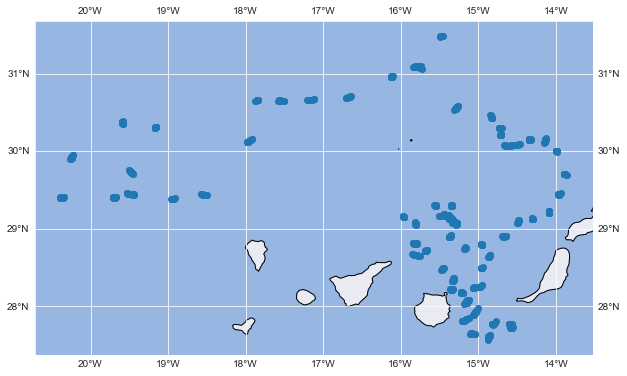

In [57]:
import cartopy.crs as ccrs
import cartopy

fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.plot(Rtraj.LONGITUDE,Rtraj.LATITUDE,'o')

ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN)
ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)

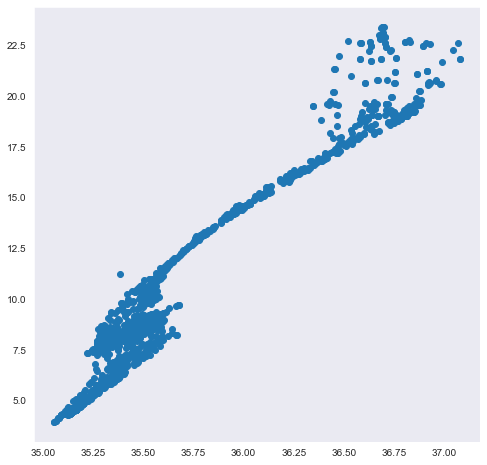

In [61]:
fig,ax = plt.subplots(figsize=(8,8))
ax.plot(Rtraj.PSAL,Rtraj.TEMP,'o')

In [50]:
Rtraj.PRES

<xarray.DataArray 'PRES' (N_MEASUREMENT: 4289)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Dimensions without coordinates: N_MEASUREMENT
Attributes:
    long_name:              Sea water pressure, equals 0 at sea-level
    standard_name:          sea_water_pressure
    units:                  decibar
    valid_min:              0.0
    valid_max:              12000.0
    C_format:               %7.1f
    FORTRAN_format:         F7.1
    resolution:             1.0
    comment_on_resolution:  PRES resolution is 1 dbar, except for measurement...
    axis:                   Z